In [1]:
import os
import pandas as pd
from time import process_time
import networkx as nx
import matplotlib.pyplot as plt
from relation_extractor import RelationExtractor
from knowledge_graph_generator import KnowledgeGraphGenerator

In [2]:
# RelationExtractor Example:  The RelationExtractor will read a span of 
# text and generate a set of triples associated with a specified entity_id.
# For example, RelationExtracto(entity_id, input_text) --> 
# [(entity_id, relation, value), ..., (entity_id, relation, value)
# Example:
extractor = RelationExtractor("Gone with the Wind", "This movie was horrible.  It was old and had a lot of racism and it was shot in Georgia.")
for i in extractor.relations:
    print(i)

('Gone with the Wind', 'features the location', 'Georgia')
('Gone with the Wind', 'features the theme', 'a lot of racism')
('Gone with the Wind', 'features the theme', 'racism')
('Gone with the Wind', 'is', 'horrible')
('Gone with the Wind', 'is', 'old')


In [3]:
# KnowledgeGraphGenerator Example:  The KnowledgeGraphGenerator will take a list 
# of DataFrames that contain textual data relating to the entity (e.g. reviews,
# summaries, etc.) and a list of DataFrames that have deterministic data related
# to the entity (e.g. knowledgeable triples (entity_id, relation, value)).  This 
# example generates the full knowledge graph for the movie, Top Gun.
# Example:
full_review_df = pd.read_csv("data/review_plot_df.csv")
review_df = full_review_df.loc[full_review_df["entity_id"] == "m/top_gun"] \
    .reset_index(drop=True)
full_known_df = pd.read_csv("data/known_df.csv")
known_df = full_known_df.loc[full_known_df["entity_id"] == "m/top_gun"] \
    .reset_index(drop=True)
generator = KnowledgeGraphGenerator(
    input_data_list=[review_df],
    known_data_list=[known_df]
)

In [4]:
# The generated DataFrame can be retrieved via:
kg_df = generator.knowledge_graph_df
kg_df.iloc[550:]

,entity_id,relation,value
21,m/top_gun,featured actor,Duke Stroud
22,m/top_gun,featured actor,Brian Sheehan
23,m/top_gun,featured actor,Ron Clark
24,m/top_gun,featured actor,Frank Pesce
25,m/top_gun,featured actor,Pete Pettigrew
26,m/top_gun,featured actor,Troy Hunter
27,m/top_gun,featured actor,Linda Rae Jurgens
28,m/top_gun,has genre,Action & Adventure
29,m/top_gun,has genre,Drama
30,m/top_gun,released on,1986


In [5]:
# The knowledge graph DataFrame can be converted into a 
# Networkx DiGraph.
kg = nx.DiGraph()
kg.add_node(kg_df["entity_id"].unique()[0])
limit = 20 #Choose 20 random triples.
kg_df = kg_df.sample(frac=1)
for i in range(limit):
    kg.add_node(
        kg_df.iloc[i]["value"],
        value=kg_df.iloc[i]["value"])
    kg.add_edge(
        kg_df["entity_id"].unique()[0],
        kg_df.iloc[i]["value"],
        relation=kg_df.iloc[i]["relation"]
    )

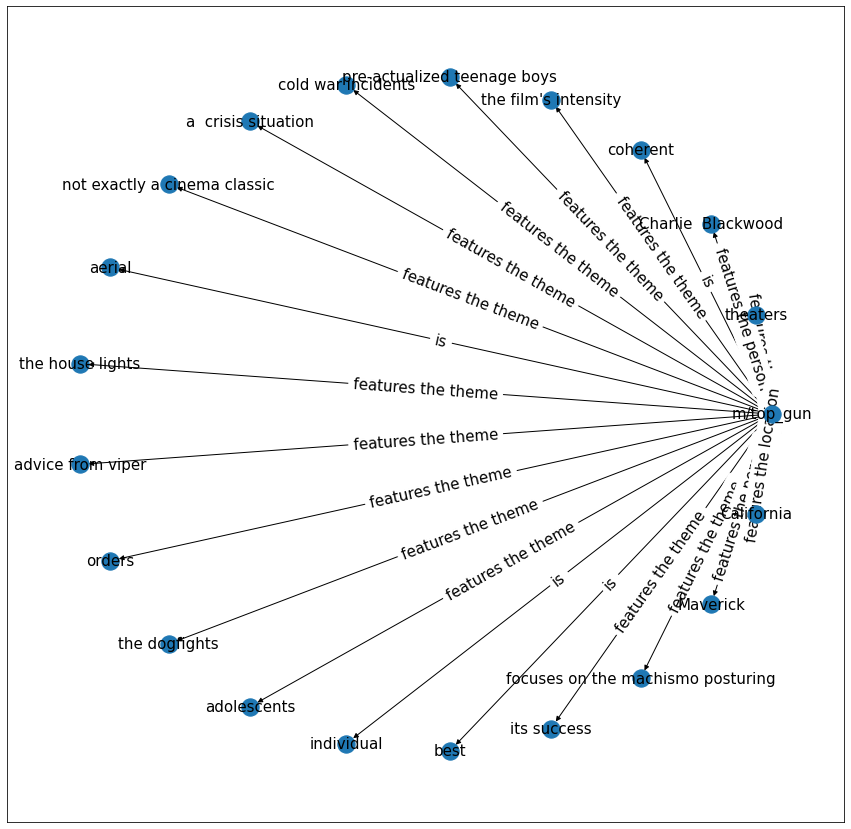

In [6]:
plt.figure(figsize=(15,15))
pos = nx.circular_layout(kg)
nx.draw_networkx(kg, pos=pos, font_size=15)
edge_labels = nx.get_edge_attributes(kg, 'relation')
nx.draw_networkx_edge_labels(kg, pos, edge_labels=edge_labels, font_size=15)
plt.show()